In [1]:
from skimage import data, io, filters
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.figure(figsize=(8, 12))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = \
        plt.subplots(ncols=2, figsize=(16, 12), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

## 1. Edge detection

In this exercise, you'll detect edges in an image by applying the Sobel filter.

![Soap pills of heart and rectangle shapes in blue background](i/1.jpg)

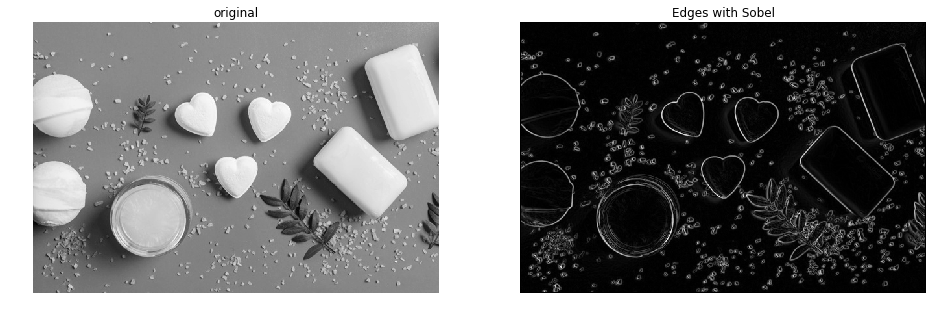

In [2]:
soaps_image = io.imread('i/1.jpg', as_gray=True)
edge_sobel = filters.sobel(soaps_image)
plot_comparison(soaps_image, edge_sobel, 'Edges with Sobel')

## 2. Blurring to reduce noise

In this exercise you will reduce the sharpness of an image of a building taken during a London trip, through filtering.

![Building in Lodon](i/2.jpg)

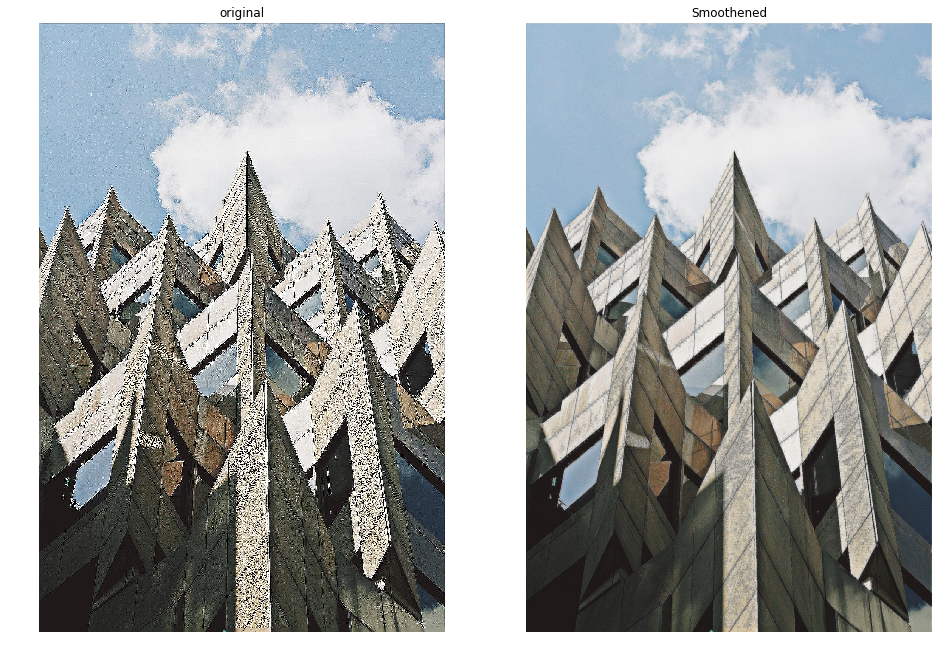

In [3]:
london_building = io.imread('i/2.jpg')
london_building_smooth = filters.gaussian(london_building, multichannel=True)
plot_comparison(london_building, london_building_smooth, 'Smoothened')

## 3. What's the contrast of this image?

![Black and white clock hanging](i/3.png)

In [4]:
grayscale_clock = io.imread('i/3.png', as_gray=True)
(255 * (grayscale_clock.max() - grayscale_clock.min())).round()

207.0

## 4. Medical images

You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the National Institutes of Health Chest X-Ray Dataset

![X-ray chest image](i/4.png)

In [5]:
lungs_xray_image = io.imread('i/4.png', as_gray=True)

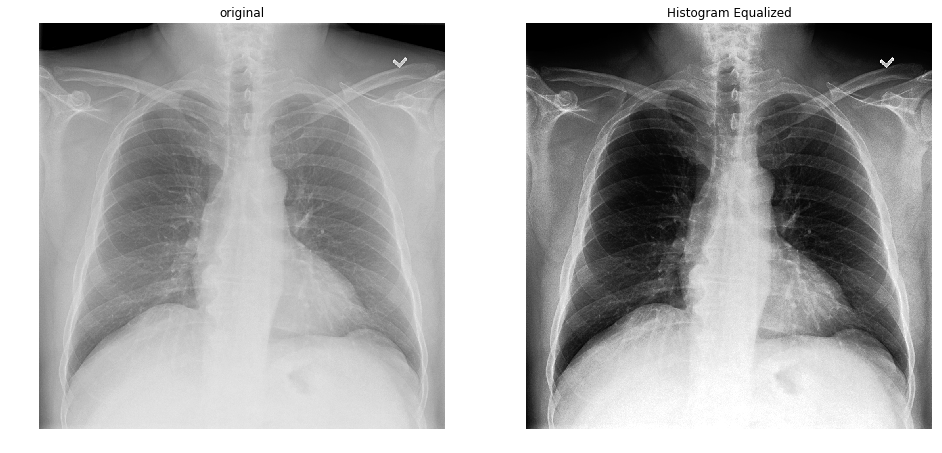

In [6]:
from skimage import exposure
lungs_xray_eq = exposure.equalize_hist(lungs_xray_image)
plot_comparison(lungs_xray_image, lungs_xray_eq, 'Histogram Equalized')

## 5. Aerial image

In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

![Aerial image, airport taken from the air](i/5.png)

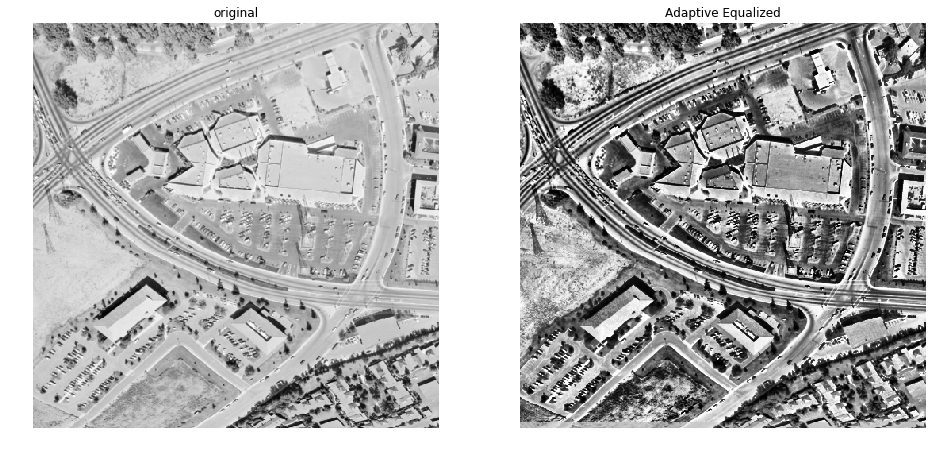

In [7]:
aerial_image = io.imread('i/5.png', as_gray=True)
aerial_image_adapteq = exposure.equalize_adapthist(aerial_image, clip_limit=.03)
plot_comparison(aerial_image, aerial_image_adapteq, 'Adaptive Equalized')

## 6. Let's add some impact and contrast

Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?

In this exercise, you'll increase the contrast of a cup of coffee. Something you could share with your friends on social media. Don't forget to use **#ImageProcessingDatacamp** as hashtag!

Even though this is not our Sunday morning coffee cup, you can still apply the same methods to any of our photos.

![Cup of coffee](i/6.png)

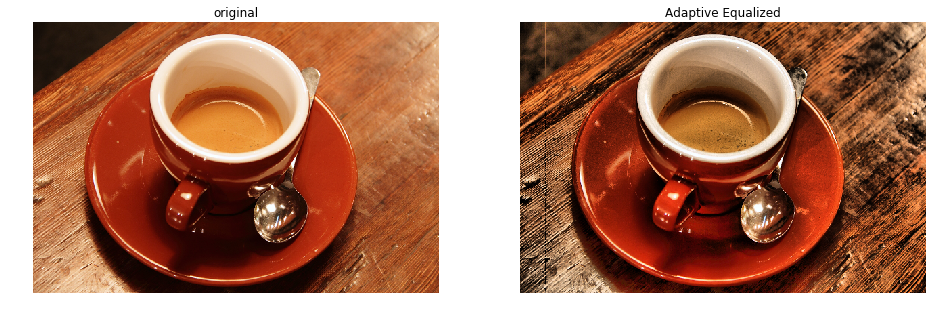

In [8]:
coffee_image = data.coffee()
coffee_adapteq = exposure.equalize_adapthist(coffee_image, clip_limit=.03)
plot_comparison(coffee_image, coffee_adapteq, 'Adaptive Equalized')

## 7. Aliasing, rotating and rescaling

Let's look at the impact of aliasing on images.

Remember that aliasing is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.

You'll make this cat image upright by rotating it 90 degrees and then rescaling it two times. Once with the anti aliasing filter applied before rescaling and a second time without it, so you can compare them.

![Little cute cat](i/7.jpg)

In [9]:
cat_image = io.imread('i/7.jpg')

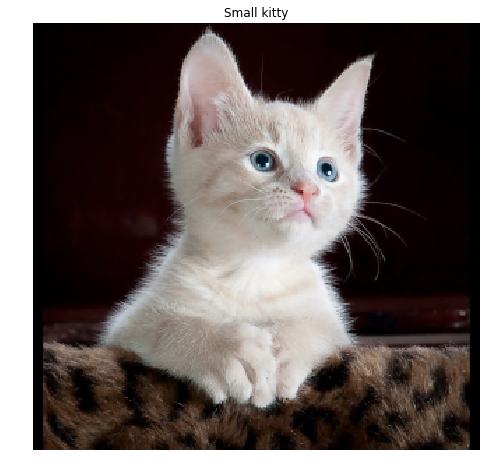

In [10]:
from skimage import transform
cat_rotated = transform.rotate(cat_image, -90)
cat_rescaled = \
    transform.rescale(cat_rotated, 1/2, anti_aliasing=True, multichannel=True)
show_image(cat_rescaled, 'Small kitty')

## 8. Enlarging images

Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry.

The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point.

In this exercise you'll enlarge an image **three times**!!

You'll do this by rescaling the image of a rocket, that will be loaded from the `data` module.

![Rocket](i/8.png)

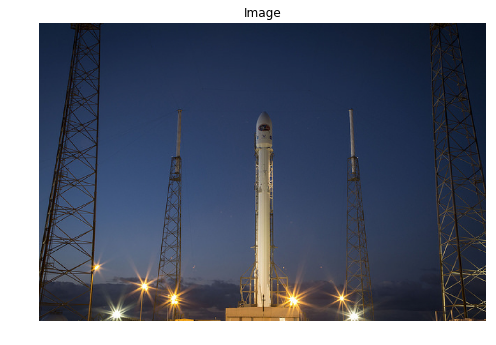

In [11]:
rocket_image = data.rocket()
enlarged_rocket = \
    transform.rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)
show_image(enlarged_rocket)

## 9. Proportionally resizing

We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

It's important that you do this proportionally, meaning that these are not distorted.

First, you'll try it out for one image so you know what code to test later in the rest of the pictures.

![dogs](i/9.jpg)

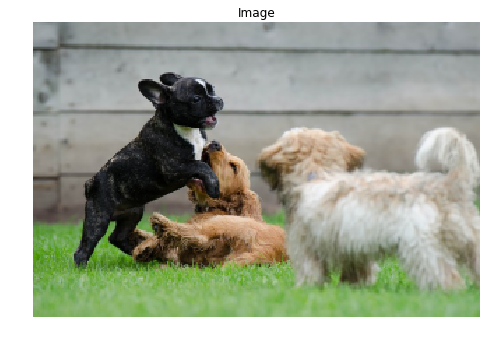

In [12]:
dogs_image = io.imread('i/9.jpg')
height, width = dogs_image.shape[0] // 2, dogs_image.shape[1] // 2
dogs_resized = transform.resize(
    dogs_image, (height, width), anti_aliasing=True)
show_image(dogs_resized)

## 10. Handwritten letters

A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (**OCR**) to distinguish printed or handwritten text characters inside digital images of physical documents.

Let's try to improve the definition of this handwritten letter so that it's easier to classify.

![Capital R](i/10.png)

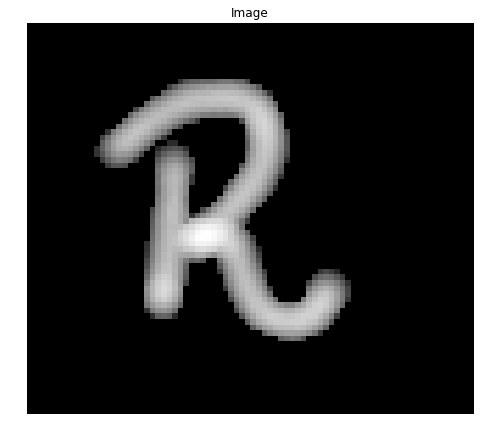

In [16]:
capital_r = io.imread('i/10.png', as_gray=True)

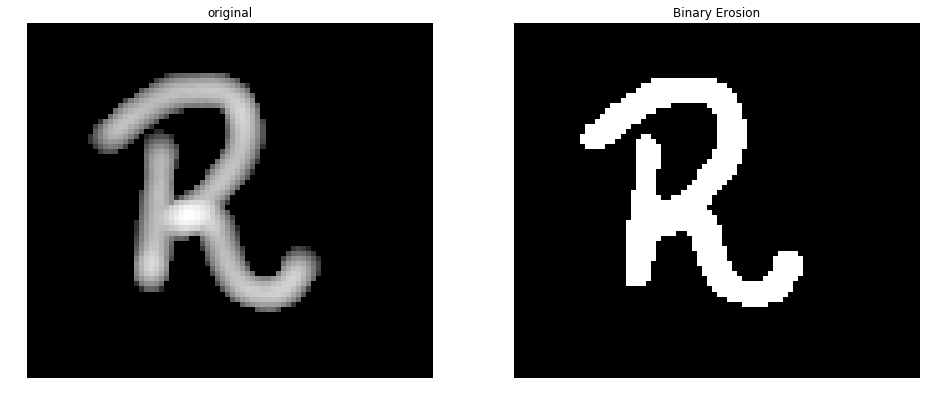

In [17]:
from skimage import morphology
eroded_r = morphology.binary_erosion(capital_r)
plot_comparison(capital_r, eroded_r, 'Binary Erosion')

## 11. Improving thresholded image

In this exercise, we'll try to reduce the noise of a thresholded image using the dilation morphological operation.

![World map](i/11.jpg)

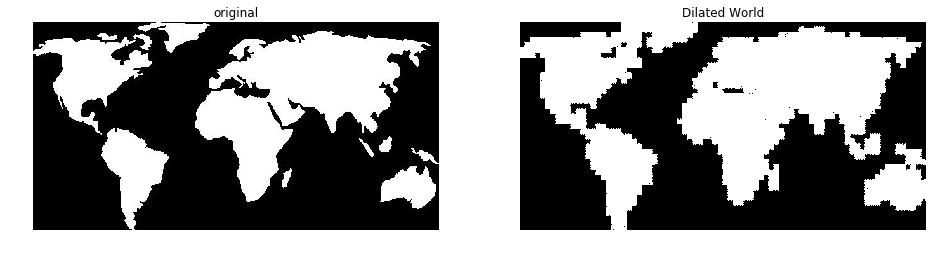

In [40]:
world_image = io.imread('i/11.jpg', as_gray=True)
world_dilated = morphology.binary_dilation(world_image)
plot_comparison(world_image, world_dilated, 'Dilated World')